<a href="https://colab.research.google.com/github/AryanKulathinal/TimeSeries_forecasting_for_weather/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings;
warnings.simplefilter('ignore')


# Install the required libraries


In [2]:
!pip install pystan prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00


# Import required libraries

In [6]:
import pandas as pd
from prophet import Prophet

# Reading the dataset

In [8]:
df=pd.read_csv('data.csv')
df.head()

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,REF
0,2021,3,31,18,2.87,0.0,59.62,7.72,100.30,202103
1,2021,3,31,19,2.68,0.0,62.12,7.64,100.38,202103
2,2021,3,31,20,2.34,0.0,66.19,7.88,100.44,202103
3,2021,3,31,21,1.88,0.0,69.12,8.09,100.48,202103
4,2021,3,31,22,1.54,0.0,67.50,8.28,100.52,202103


# Preprocessing the Dataset

## Combine Year month and day fields to one date field

In [9]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

In [10]:
df.head()

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,REF,Date
0,2021,3,31,18,2.87,0.0,59.62,7.72,100.30,202103,2021-03-31
1,2021,3,31,19,2.68,0.0,62.12,7.64,100.38,202103,2021-03-31
2,2021,3,31,20,2.34,0.0,66.19,7.88,100.44,202103,2021-03-31
3,2021,3,31,21,1.88,0.0,69.12,8.09,100.48,202103,2021-03-31
4,2021,3,31,22,1.54,0.0,67.50,8.28,100.52,202103,2021-03-31


## Drop unwanted Columns

In [11]:
# List of column names to drop
columns_to_keep = ['Date', 'TEMP']

# Drop the specified columns
df = df[columns_to_keep]




In [13]:
df.head()

,Date,TEMP
0,2021-03-31,2.87
1,2021-03-31,2.68
2,2021-03-31,2.34
3,2021-03-31,1.88
4,2021-03-31,1.54


In [14]:
df.dtypes

Date    datetime64[ns]
TEMP           float64
dtype: object

## Rename fields for training

In [16]:
df.columns=['ds','y']


In [17]:
df.head()

,ds,y
0,2021-03-31,2.87
1,2021-03-31,2.68
2,2021-03-31,2.34
3,2021-03-31,1.88
4,2021-03-31,1.54


# Model Training


In [18]:
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdtn5jg6q/52bzw_pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdtn5jg6q/t449d7rt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77436', 'data', 'file=/tmp/tmpdtn5jg6q/52bzw_pe.json', 'init=/tmp/tmpdtn5jg6q/t449d7rt.json', 'output', 'file=/tmp/tmpdtn5jg6q/prophet_modela4prt9e0/prophet_model-20240101192300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:23:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:23:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [19]:
future=m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-31,4.543002,-0.919139,13.703516,4.543002,4.543002,2.372904,2.372904,2.372904,6.766287,...,0.447300,0.447300,0.447300,-4.840684,-4.840684,-4.840684,0.0,0.0,0.0,6.915906
1,2021-04-01,4.545506,0.001816,14.297656,4.545506,4.545506,2.464048,2.464048,2.464048,6.766287,...,0.261897,0.261897,0.261897,-4.564136,-4.564136,-4.564136,0.0,0.0,0.0,7.009554
2,2021-04-02,4.548010,-1.163951,14.029879,4.548010,4.548010,2.168393,2.168393,2.168393,6.766287,...,-0.284422,-0.284422,-0.284422,-4.313472,-4.313472,-4.313472,0.0,0.0,0.0,6.716402
3,2021-04-03,4.550513,-0.250550,13.989093,4.550513,4.550513,2.267019,2.267019,2.267019,6.766287,...,-0.408274,-0.408274,-0.408274,-4.090994,-4.090994,-4.090994,0.0,0.0,0.0,6.817532
4,2021-04-04,4.553017,0.131631,15.081973,4.553017,4.553017,2.692915,2.692915,2.692915,6.766287,...,-0.175052,-0.175052,-0.175052,-3.898319,-3.898319,-3.898319,0.0,0.0,0.0,7.245932


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1040,2024-02-04,2.370558,-12.506898,2.127183,0.176964,4.240114,-7.191348,-7.191348,-7.191348,6.766287,...,-0.175052,-0.175052,-0.175052,-13.782583,-13.782583,-13.782583,0.0,0.0,0.0,-4.820790
1041,2024-02-05,2.365606,-12.248355,2.245682,0.143957,4.257520,-7.076247,-7.076247,-7.076247,6.766287,...,-0.141777,-0.141777,-0.141777,-13.700756,-13.700756,-13.700756,0.0,0.0,0.0,-4.710641
1042,2024-02-06,2.360653,-11.431221,3.394475,0.117526,4.277228,-6.518528,-6.518528,-6.518528,6.766287,...,0.300329,0.300329,0.300329,-13.585145,-13.585145,-13.585145,0.0,0.0,0.0,-4.157875
1043,2024-02-07,2.355701,-11.618774,3.311329,0.091095,4.296936,-6.223389,-6.223389,-6.223389,6.766287,...,0.447300,0.447300,0.447300,-13.436977,-13.436977,-13.436977,0.0,0.0,0.0,-3.867688
1044,2024-02-08,2.350749,-11.306778,3.653832,0.064665,4.326286,-6.229986,-6.229986,-6.229986,6.766287,...,0.261897,0.261897,0.261897,-13.258170,-13.258170,-13.258170,0.0,0.0,0.0,-3.879237


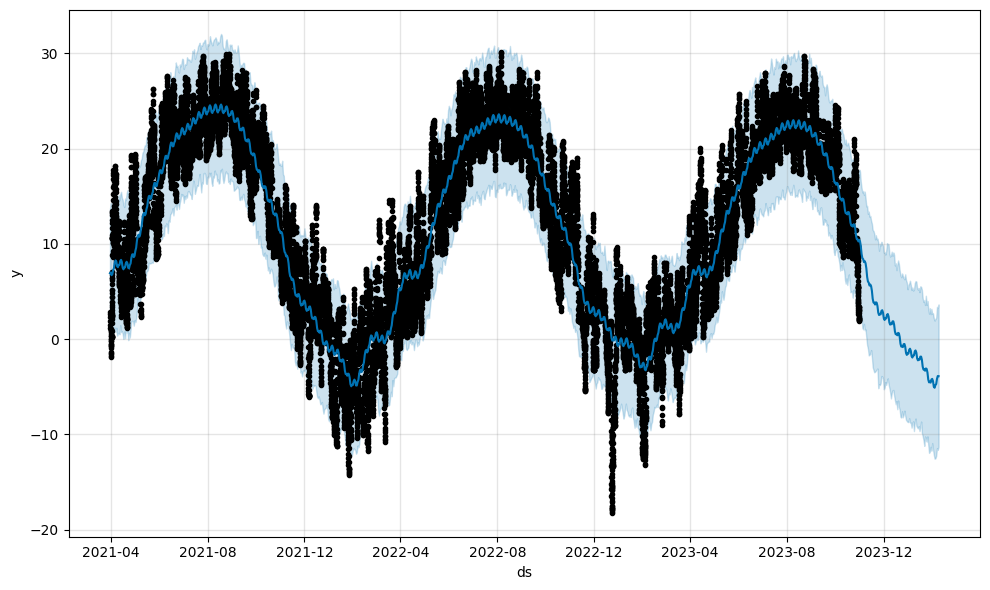

In [25]:
plot1=m.plot(forecast)

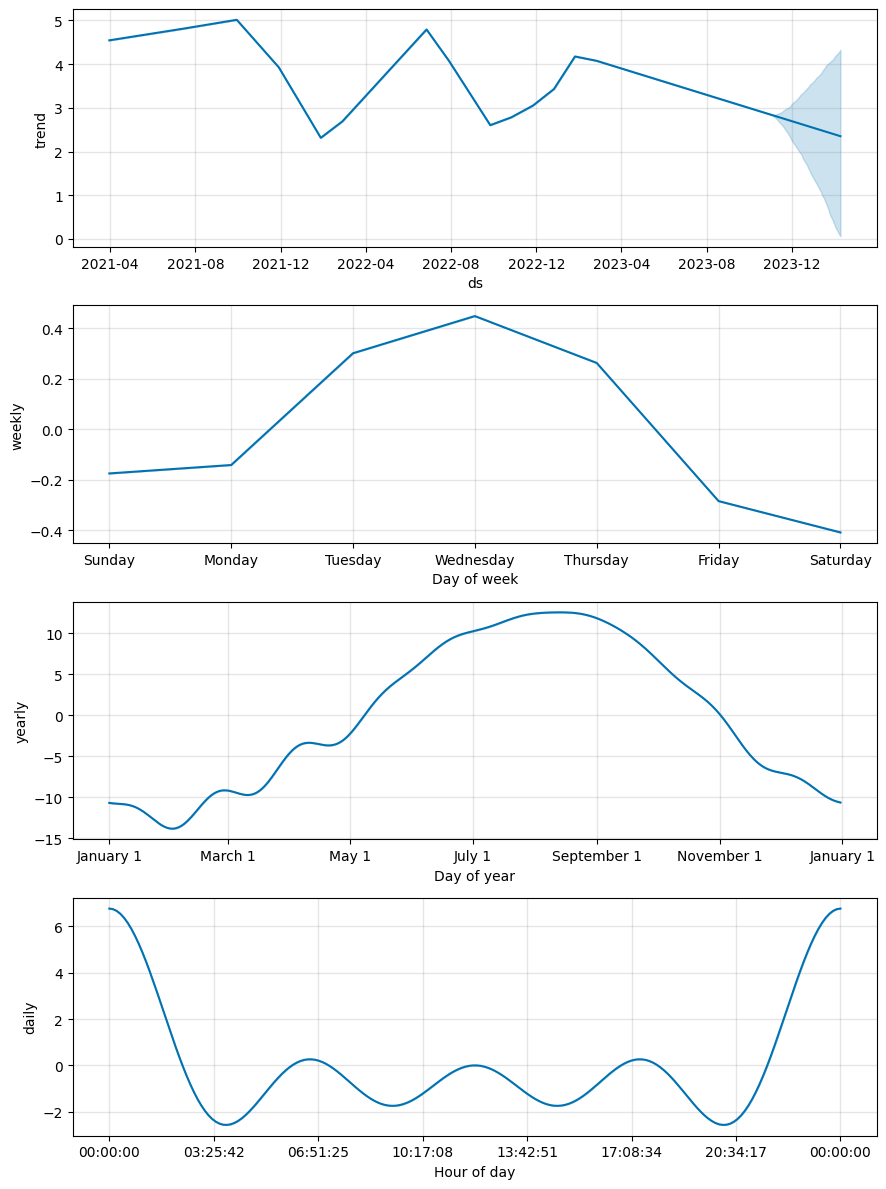

In [26]:
plot2=m.plot_components(forecast)

In [21]:
prediction=forecast[['ds','yhat']]
prediction.columns=['Date','Predicted Temp']


In [22]:
prediction.head()

,Date,Predicted Temp
0,2021-03-31,6.915906
1,2021-04-01,7.009554
2,2021-04-02,6.716402
3,2021-04-03,6.817532
4,2021-04-04,7.245932


In [23]:
prediction.tail()

,Date,Predicted Temp
1040,2024-02-04,-4.820790
1041,2024-02-05,-4.710641
1042,2024-02-06,-4.157875
1043,2024-02-07,-3.867688
1044,2024-02-08,-3.879237


In [27]:
desired_date = '2024-01-01'

# Convert the string to a datetime object
desired_date = pd.to_datetime(desired_date)

# Select rows where the date matches the desired date
result = prediction[prediction['Date'].dt.date == desired_date.date()]

# Print the result
print(result)

           Date  Predicted Temp
1006 2024-01-01       -1.508777
